# Численные методы, лабораторная работа №2 
*****
## Интерполяционный многочлен в форме Лагранжа.

* * * * *  
### Задание №1 ###
* * * * *  

#### 1) Произвольно выбрать 5 точек с абсциссами от -1 до 1 и ординатами от 0 до 1 и построить интерполяционный многочлен Лагранжа. Какой степени многочлен будет построен? ####

##### Для работы с вычислениями и отрисовкой графика поключим следующие библиотеки: #####

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

##### Для вычисления значений функции многочленом Лагранжа напишем следующую функцию:

In [9]:
def funLagrange(x, y, t):
  n = len(x)
  ans = 0
  for i in range(n):
    nom = 1
    den = 1
    for j in range(n):
      if i != j:
        nom = nom * (t - x[j])
        den = den * (x[i] - x[j])
    ans = ans + y[i] * nom / den
  return ans

##### Выбор 5-и произвольных точек, осуществляется следующим способом:

In [39]:
genX = 2 * np.random.random(5) - 1
genY = np.random.random(5)
print("x: ", genX, "\ny: ", genY)

x:  [-0.16617645 -0.44414519 -0.50987784  0.512915    0.43710427] 
y:  [0.73551937 0.55107782 0.9255429  0.05117164 0.03485189]


##### Таким образом мы создали 2 списка, списоки с координатами точек по координатам x и y.
##### По имеющимся координатам, построим многочлен Лагранжа и выведем график, с помощью подключенной ранее библиотеки:

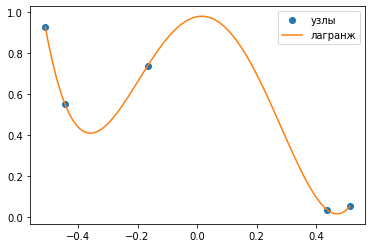

In [40]:
x_coords = np.linspace(np.min(genX), np.max(genX), 100)
y_coords = [funLagrange(genX, genY, i) for i in x_coords]
plt.plot(genX, genY, 'o', label="узлы")
plt.plot(x_coords, y_coords, label="лагранж")
plt.legend()
plt.show()

##### Построен многочлен Лагранжа 4 степени.

* * * * * 

#### 2) Аппроксимировать заданную функцию f(x) многочленом  $L_n(x)$, $f(x) = \frac{1}{1+dx^2}, x \in [-1,1]$;

##### Номер в списке 8, от сюда следует, что переменные: $k=7$, $d=17$, следовательно $f(x) = \frac{1}{1+17x^2}$;

In [41]:
def f(x):
  return 1 / (1 + 17 * x * x)

##### а) равномерное разбиение при $n = 4; 10; 20;$ при этом $x_i=-1+ih$, $h=\frac{2}{n}$, $i = \overline{0, n}$.
##### Для равномерного разбиения $n = 4; 10; 20$ создадим список $l$, который будет хранить значения n

n =  4


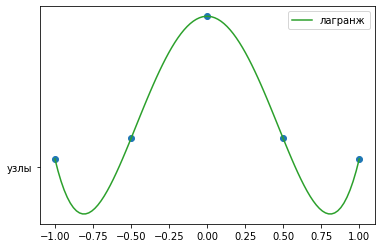

n =  10


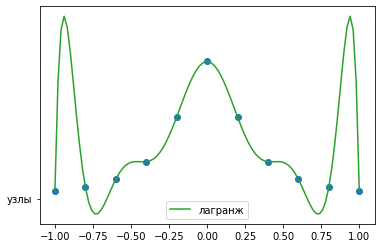

n =  20


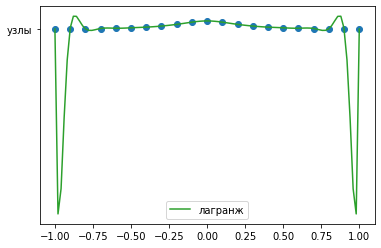

In [42]:
l = [4, 10, 20]
for n in l:
  print("n = ", n)
  h = 2 / n
  x = np.array([(-1 + i * h) for i in range(n + 1)])
  y = np.array([f(x[i]) for i in range(n + 1)])
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [funLagrange(x, y, i) for i in x_coords]
  plt.plot(x, y, "o", "узлы")
  plt.plot(x_coords, y_coords, label="лагранж")
  plt.legend()
  plt.show()

##### б) узлы интерполяции - нули многочлена Чебышева $1$-го рода $T_{n+1}(x)$:

#### $x_i=\cos\left(\frac{(2i+1)\pi}{N}\right), N = 2 (n+1), i= \overline{0, n}$

n =  4


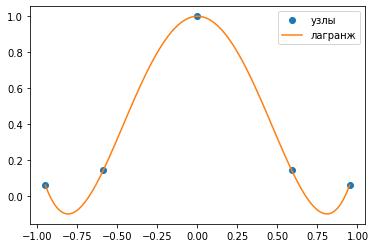

n =  10


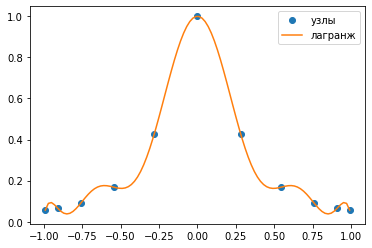

n =  20


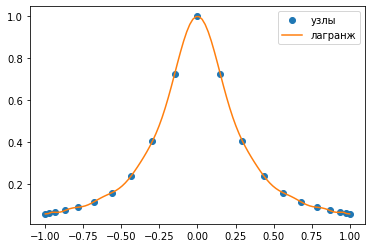

In [43]:
def get_x(i, N):
  return np.cos((2 * i + 1) * np.pi / N)
for n in l:
  print("n = ", n)
  N = 2 * (n + 1)
  x = np.array([get_x(i, N) for i in range(n + 1)])
  y = np.array([f(x[i]) for i in range(n + 1)])
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [funLagrange(x, y, i) for i in x_coords]
  plt.plot(x, y, "o", label="узлы")
  plt.plot(x_coords, y_coords, label="лагранж")
  plt.legend()
  plt.show()

* * * * *  
### Задание №2 ###
* * * * *  

#### Используя графическое представление $L_n(x)$ на [a, b], исследовать сходимость интерполяционного процесса для заданной функции.

n =  4


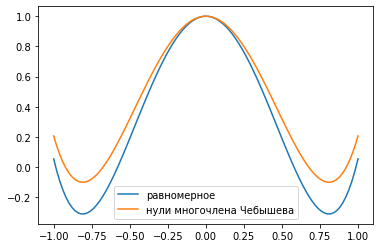

n =  10


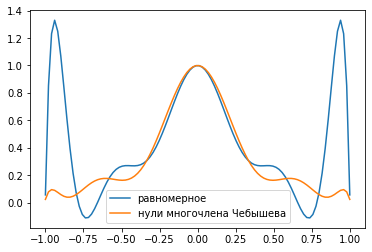

n =  20


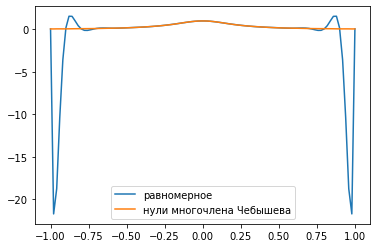

In [44]:
for n in l:
  print("n = ", n)
  h = 2 / n
  x1 = np.array([(-1 + i * h) for i in range(n + 1)])
  y1 = np.array([f(x1[i]) for i in range(n + 1)])
  x_coords1 = np.linspace(-1, 1, 100)
  y_coords1 = [funLagrange(x1, y1, i) for i in x_coords1]

  N = 2 * (n + 1)
  x2 = np.array([get_x(i, N) for i in range(n + 1)])
  y2 = np.array([f(x2[i]) for i in range(n + 1)])
  x_coords2 = np.linspace(-1, 1, 100)
  y_coords2 = [funLagrange(x2, y2, i) for i in x_coords2]
  plt.plot(x_coords1, y_coords1, label="равномерное")
  plt.plot(x_coords2, y_coords2, label="нули многочлена Чебышева")
  plt.legend()
  plt.show()

*****

## Интерполяционный многочлен в форме Ньютона. Разделенные разности.

* * * * *  
### Задание №3 ###
* * * * *  

#### 1) Произвольно выбрать те же 5 точек с абсциссами от -1 до 1 и ординатами от 0 до 1, что и в первом задании, построить интерполяционный многочлен Ньютона и убедиться, что он идентичен многочлену Лагранжа.

##### Напишем функцию для вычисления разделенных разностей:

In [45]:
def dividedDif(x, y):
  dif = [[0 for j in range(len(x))] for i in range(len(x) + 1)]
  for i in range(len(x) - 1):
    dif[2][i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])
  for i in range(3, len(x) + 1):
    for j in range(0, len(x) - i + 1):
      dif[i][j] = (dif[i - 1][j + 1] - dif[i - 1][j]) / (x[j + i - 1] - x[j])
  return dif

##### Так же напишем функцию для вычисления значений многочлена Ньютона в точке:

In [46]:
def funNewton(x, y, t):
  dif = dividedDif(x, y)
  ans = y[0]
  for i in range(1, len(x)):
    cur = dif[i + 1][0]
    for j in range(i):
      cur = cur * (t - x[j])
    ans = ans + cur
  return ans

#### Сравнение многочлена Ньютона и многочлена Лагранжа:

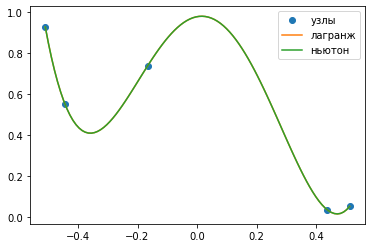

In [47]:
x_coords = np.linspace(np.min(genX), np.max(genX), 100)
y_coords_lagrange = [funLagrange(genX, genY, i) for i in x_coords]
y_coords_newton = [funNewton(genX, genY, i) for i in x_coords]

plt.plot(genX, genY, "o", label="узлы")
plt.plot(x_coords, y_coords_lagrange, label="лагранж")
plt.plot(x_coords, y_coords_newton, label="ньютон")
plt.legend()
plt.show()

*****
#### 2) Аппроксимировать заданную функцию $f(x)$ интерполяционным многочленом в любой форме при $x\in[-1,1]; x_i=-1+ih, h=\frac{2}{n}, i = \overline{0,n}; n=10,20$
##### Очистим список $l$, и заполним новыми значениями $n$:

In [58]:
l = [10, 20]

##### Напишем функцию А) $f(x)=|x|$:

In [59]:
def f(x):
  return abs(x)

n =  10


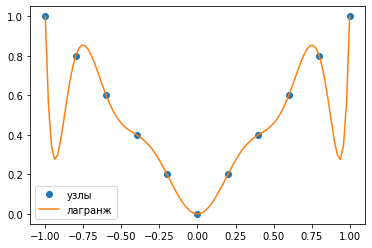

n =  20


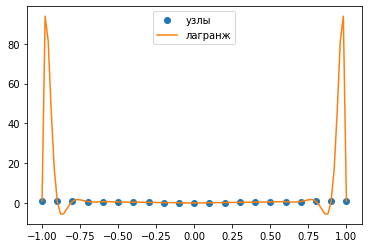

In [60]:
for n in l:
  print("n = ", n)
  h = 2 / n
  x = [(-1 + i * h) for i in range(n + 1)]
  y = [f(x[i]) for i in range(n + 1)]
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [funLagrange(x, y, i) for i in x_coords]

  plt.plot(x, y, "o", label="узлы")
  plt.plot(x_coords, y_coords, label="лагранж")
  plt.legend()
  plt.show()

##### Как мы видим, процесс расходится.

##### Напишем функцию Б) $f(x)=x^3$:

In [61]:
def f(x):
  return x**3

n =  10


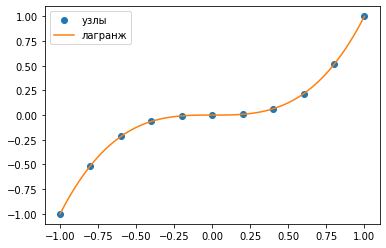

n =  20


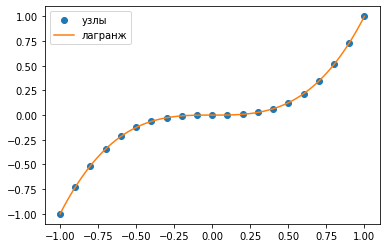

In [62]:
for n in l:
  print("n = ", n)
  h = 2 / n
  x = [(-1 + i * h) for i in range(n + 1)]
  y = [f(x[i]) for i in range(n + 1)]
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [funLagrange(x, y, i) for i in x_coords]

  plt.plot(x, y, "o", label="узлы")
  plt.plot(x_coords, y_coords, label="лагранж")
  plt.legend()
  plt.show()


##### Напишем функцию В) $f(x)=\cos\left(\frac{\pi x}{2}\right)$:

In [63]:
def f(x):
  return math.cos(math.pi * x / 2)

n =  10


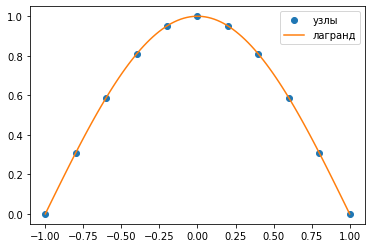

n =  20


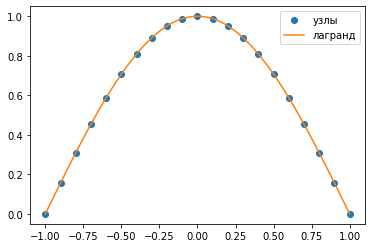

In [65]:
for n in [10, 20]:
  print("n = ", n)
  h = 2 / n
  x = [(-1 + i * h) for i in range(n + 1)]
  y = [f(x[i]) for i in range(n + 1)]
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [funLagrange(x, y, i) for i in x_coords]

  plt.plot(x, y, "o", label="узлы")
  plt.plot(x_coords, y_coords, label="лагранд")
  plt.legend()
  plt.show()

*****